# Phase 2 Project



Folder Contents:

In [1]:
%ls

CONTRIBUTING.md        dj-Copy1.ipynb         rachaelnotebook.ipynb
LICENSE.md             dj.ipynb               student.ipynb
README.md              halfway-there.gif
data/                  jake.ipynb


## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder


plt.style.use('seaborn-notebook')

## Initial Data Exploration

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
#Find null values
(df.isna().sum().sort_values(ascending=False))/len(df)

heat_source      0.001061
sewer_system     0.000464
id               0.000000
grade            0.000000
lat              0.000000
address          0.000000
yr_renovated     0.000000
yr_built         0.000000
sqft_patio       0.000000
sqft_garage      0.000000
sqft_basement    0.000000
sqft_above       0.000000
condition        0.000000
date             0.000000
view             0.000000
nuisance         0.000000
greenbelt        0.000000
waterfront       0.000000
floors           0.000000
sqft_lot         0.000000
sqft_living      0.000000
bathrooms        0.000000
bedrooms         0.000000
price            0.000000
long             0.000000
dtype: float64

In [6]:
df['grade'].value_counts().sort_index()

1 Cabin              2
10 Very Good      1371
11 Excellent       406
12 Luxury          122
13 Mansion          24
2 Substandard        2
3 Poor              13
4 Low               51
5 Fair             393
6 Low Average     2858
7 Average        11697
8 Good            9410
9 Better          3806
Name: grade, dtype: int64

In [7]:
df['sqft_living'].describe()

count    30155.000000
mean      2112.424739
std        974.044318
min          3.000000
25%       1420.000000
50%       1920.000000
75%       2619.500000
max      15360.000000
Name: sqft_living, dtype: float64

Get zipcode into its own column by splitting it from address column.
Followed by a loop that only keeps the the zipcodes that have a frequency of at least 100 homes in them.

In [8]:
df['yr_renovated'].value_counts()

0       28783
2021       69
2006       49
2018       44
1990       42
        ...  
1942        1
1951        1
1948        1
1972        1
1924        1
Name: yr_renovated, Length: 83, dtype: int64

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

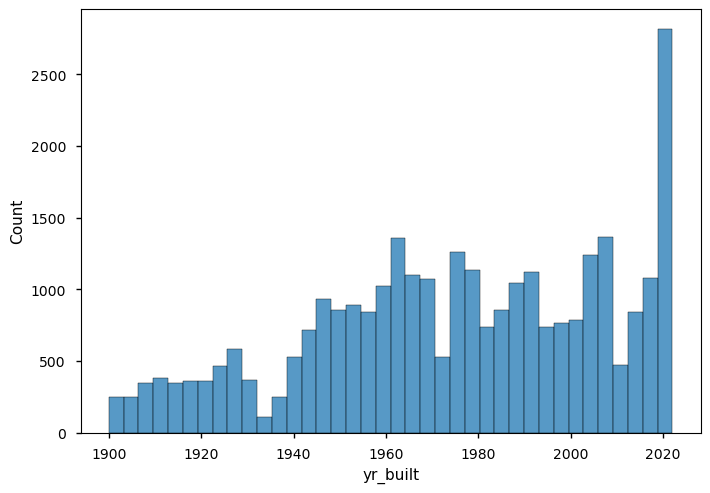

In [9]:
sns.histplot(df['yr_built'])

In [10]:
df['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

Creating columns for Price per square foot for living space, and lot space.

## Data Cleaning and Engineering

Price per square foot columns for Lot and Living.

In [11]:
df['ppsq_living'] = (df['price']/df['sqft_living']).round(2)

In [12]:
df['ppsq_living'].mean()

561.5095244569712

In [13]:
df['ppsq_lot'] = (df['price']/df['sqft_lot']).round(2) #feature engineering lot price per square ft

In [14]:
zips = pd.DataFrame([int(x[-20:-15]) for x in df['address']])
df['zipcode'] = zips


goodzips = []
for key, value in df['zipcode'].value_counts().items():
    if value > 100:
        goodzips.append(key)
    else:
        continue
len(goodzips)
df = df[df['zipcode'].isin(goodzips) == True]

In [15]:
pricelot_zipcode = df.groupby('zipcode').mean()['ppsq_lot'].sort_values(ascending=False)

<AxesSubplot:xlabel='zipcode'>

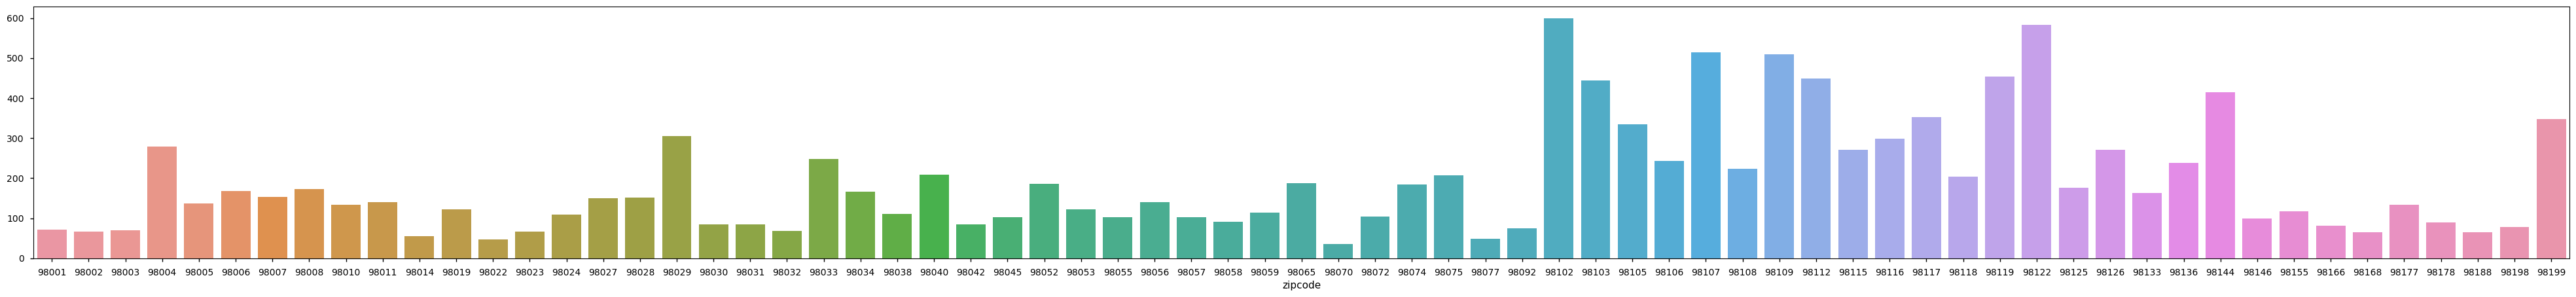

In [16]:
fig, ax = plt.subplots(figsize=(50, 5))

sns.barplot(x=pricelot_zipcode.index, y=pricelot_zipcode.values)

<AxesSubplot:>

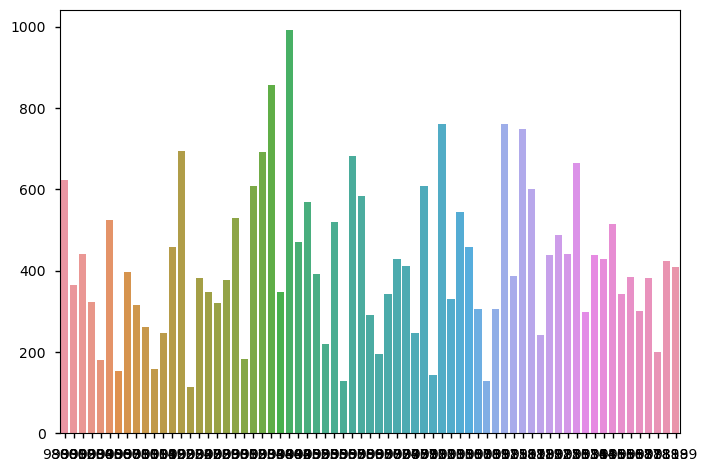

In [17]:
sns.barplot(x = df['zipcode'].value_counts().index, y=df['zipcode'].value_counts().values)

Drop tiny homes from the dataset. In Washington, the tiny home sqaure footage is 400sq ft. 

In [18]:
df = df[df['sqft_living'] > 400]

Turn Columns into numeric values. 
Binary values become 1 if present, 0 if not present

In [19]:
for x in df[['waterfront', 'greenbelt', 'nuisance']]: # converting YES and NO to 1 and 0
    df[x] = df[x].replace("NO", 0).replace("YES", 1)

In [20]:
df[['waterfront', 'greenbelt', 'nuisance']].sum()/len(df)

waterfront    0.017305
greenbelt     0.026633
nuisance      0.171002
dtype: float64

Create new columns for Basement, Patio, and Garage presence. 1 if present (sqaure feet over 0), 0 if not.

<AxesSubplot:xlabel='sqft_basement', ylabel='Count'>

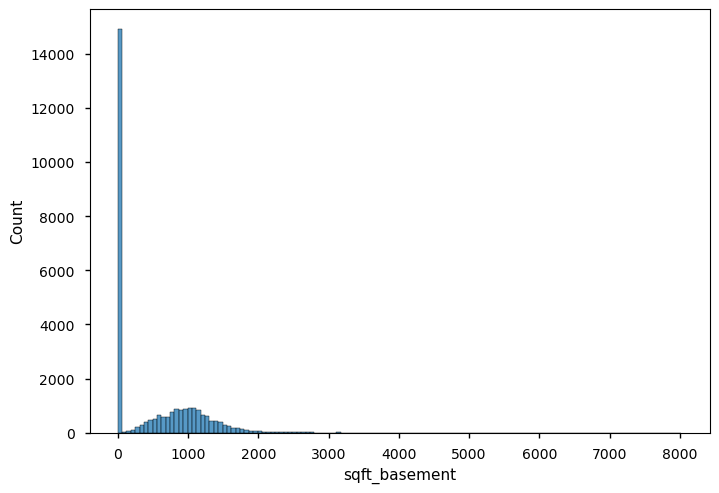

In [21]:
sns.histplot(df['sqft_basement'])

In [22]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      19
sewer_system     10
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
ppsq_living       0
ppsq_lot          0
zipcode           0
dtype: int64

In [23]:
df.reset_index(inplace=True)

In [24]:
basement_no_basement = []
for item in df['sqft_basement']:
    if item > 0:
        basement_no_basement.append(1)
    else:
        basement_no_basement.append(0)
df['basement'] = pd.DataFrame(basement_no_basement)

In [25]:
patio_no_patio = []
for item in df['sqft_patio']:
    if item > 0:
        patio_no_patio.append(1)
    else:
        patio_no_patio.append(0)
df['patio'] = pd.DataFrame(patio_no_patio)

In [26]:
garage_no_garage = []
for item in df['sqft_garage']:
    if item > 0:
        garage_no_garage.append(1)
    else:
        garage_no_garage.append(0)
df['garage'] = pd.DataFrame(garage_no_garage)

Drop Address, Latitude, Longitude, and Condition

In [27]:
df.drop(['address', 'lat', 'long', 'condition'], axis=1, inplace=True)

Finding the IQR for Price, ruling out outliers by multiplying IQR by 1.5

In [28]:
iqrprice = np.percentile(df['price'], 75) -np.percentile(df['price'], 25)
lower_lim_price =np.percentile(df['price'], 25) - 1.5*iqrprice
upper_lim_price =np.percentile(df['price'], 75) + 1.5*iqrprice
print(f'anything above {upper_lim_price} and below {lower_lim_price} is an outlier')

anything above 2300625.0 and below -340375.0 is an outlier


In [29]:
df = df[df['price'] < 2300625.0] #filtering out the outliers based on the above cell

/Users/RachaelMcCue/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

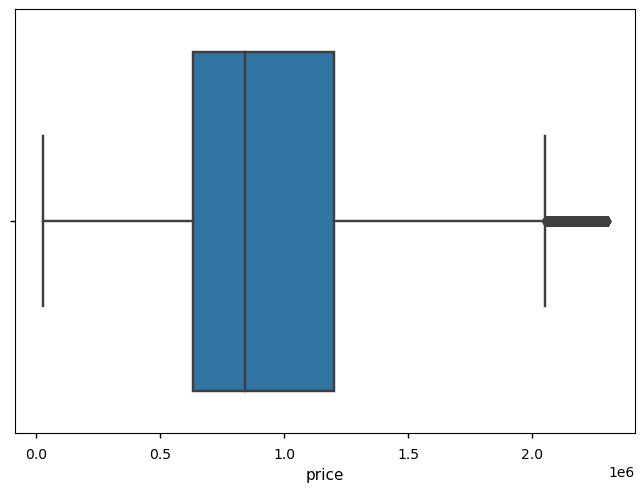

In [30]:
sns.boxplot(df['price'])

In [31]:
df['price'].describe()

count    2.701400e+04
mean     9.519827e+05
std      4.429122e+05
min      2.756300e+04
25%      6.320000e+05
50%      8.400000e+05
75%      1.200000e+06
max      2.300000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

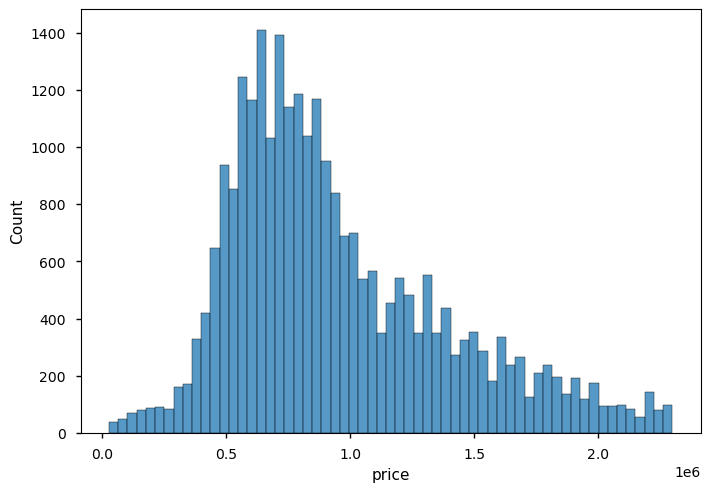

In [32]:
sns.histplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

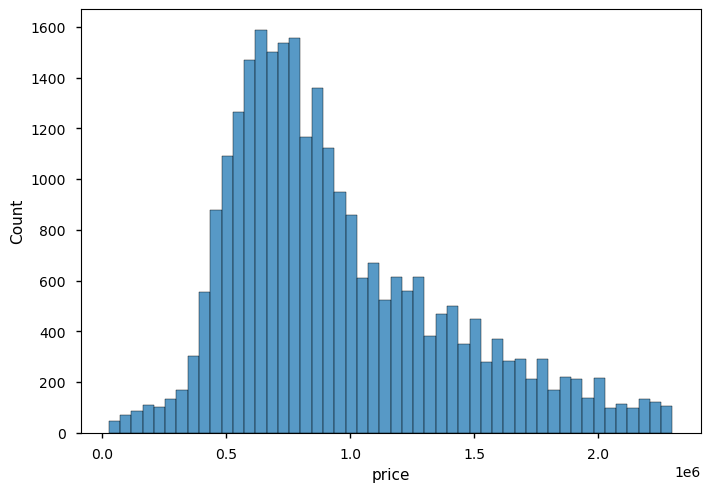

In [33]:
sns.histplot(df['price'], bins=50)

Finding the IQR for Bedrooms, ruling out outliers by multiplying IQR by 1.5

In [34]:
iqrbedrooms = np.percentile(df['bedrooms'], 75) -np.percentile(df['bedrooms'], 25) ##calculating the upper and lower limits for outliers using iqr*1.5
lower_lim_bedrooms =np.percentile(df['bedrooms'], 25) - 1.5*iqrbedrooms
upper_lim_bedrooms =np.percentile(df['bedrooms'], 75) + 1.5*iqrbedrooms
print(f'anything above {upper_lim_bedrooms} and below {lower_lim_bedrooms} is an outlier')

anything above 5.5 and below 1.5 is an outlier


In [35]:
df = df[df['yr_built'] >= 2013]

In [36]:
df.drop(['id', 'date', 'yr_renovated'], axis=1, inplace=True)

## Initial Analysis for building models

In [37]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.584544
sqft_above       0.504575
bathrooms        0.478551
bedrooms         0.423555
ppsq_living      0.381096
sqft_garage      0.358359
sqft_basement    0.257713
garage           0.239844
sqft_patio       0.229328
greenbelt        0.128112
sqft_lot         0.122000
basement         0.089256
waterfront       0.071921
patio            0.040278
index           -0.022120
nuisance        -0.025172
yr_built        -0.095147
ppsq_lot        -0.102293
zipcode         -0.135847
floors          -0.153045
Name: price, dtype: float64

In [38]:
#sns.pairplot(df)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3487 entries, 7 to 28830
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          3487 non-null   int64  
 1   price          3487 non-null   float64
 2   bedrooms       3487 non-null   int64  
 3   bathrooms      3487 non-null   float64
 4   sqft_living    3487 non-null   int64  
 5   sqft_lot       3487 non-null   int64  
 6   floors         3487 non-null   float64
 7   waterfront     3487 non-null   int64  
 8   greenbelt      3487 non-null   int64  
 9   nuisance       3487 non-null   int64  
 10  view           3487 non-null   object 
 11  grade          3487 non-null   object 
 12  heat_source    3484 non-null   object 
 13  sewer_system   3480 non-null   object 
 14  sqft_above     3487 non-null   int64  
 15  sqft_basement  3487 non-null   int64  
 16  sqft_garage    3487 non-null   int64  
 17  sqft_patio     3487 non-null   int64  
 18  yr_buil

## Dummy Regressor

The baseline model is comparing the mean sale price to the actual sale price.

In [40]:
df['avg_price'] = df['price'].mean()
X = df['avg_price']
y = df['price']
dummy_model = sm.OLS(y, sm.add_constant(X)).fit()
dummy_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 14 Feb 2023   Prob (F-statistic):                nan
Time:                        14:51:22   Log-Likelihood:                -50223.
No. Observations:                3487   AIC:                         1.004e+05
Df Residuals:                    3486   BIC:                         1.005e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avg_price      1.0000      0.007    139.635      0.000       0.986       1.014
==============================================================================
Omnibus:                      462.309   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              662.589
Skew:                           1.049   Prob(JB):                    1.32e-144
Kurtosis:                       3.396   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Simple Linear Regression Model

Our simple linear regression models sqft_above with price. "Square feet above" was chosen because "square feet living" is not informative to the stakeholder. 

In [41]:
x = df['sqft_above']
y = df['price']
simple_reg = sm.OLS(y, sm.add_constant(x)).fit()
simple_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     1190.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):          1.18e-224
Time:                        14:51:22   Log-Likelihood:                -49710.
No. Observations:                3487   AIC:                         9.942e+04
Df Residuals:                    3485   BIC:                         9.944e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.889e+05   1.69e+04     28.902      0.000    4.56e+05    5.22e+05
sqft_above   244.7998      7.095     34.501      0.000     230.888     258.712
==============================================================================
Omnibus:                      260.887   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.400
Skew:                           0.698   Prob(JB):                     3.61e-71
Kurtosis:                       3.534   Cond. No.                     6.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation

For every square foot added, price increases by $244.80.
The variable is significant as its below the P value, given the threshold of the significance level is 95%.
The Square feet above ground explains about 25% of the variability in price.

## First Multiple Linear Regression Model

Standard scale all X variables. This does not include categorical variables, such as "heat source" and "grade".

In [43]:
scaler = StandardScaler().fit_transform(df.drop(['view', 'grade', 'heat_source', 'sewer_system', 'index'], axis=1))
scaler_df = pd.DataFrame(scaler)
scaler_df.columns = df.drop(['view', 'grade', 'heat_source', 'sewer_system', 'index'], axis=1).columns

In [50]:

x = scaler_df.drop(['price', 'zipcode', 'ppsq_living', 'ppsq_lot', 'avg_price'], axis=1)
y = scaler_df['price']

model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     168.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:25:53   Log-Likelihood:                -3944.2
No. Observations:                3487   AIC:                             7922.
Df Residuals:                    3470   BIC:                             8027.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.691e-15      0.013   -2.9e-13      1.000      -0.025       0.025
bedrooms         -0.0369      0.021     -1.720      0.086      -0.079       0.005
bathrooms         0.0498      0.020      2.493      0.013       0.011       0.089
sqft_living       0.1744      0.101      1.732      0.083      -0.023       0.372
sqft_lot         -0.0042      0.014     -0.306      0.760      -0.031       0.023
floors            0.0284      0.016      1.813      0.070      -0.002       0.059
waterfront        0.0240      0.013      1.857      0.063      -0.001       0.049
greenbelt         0.0506      0.013      3.930      0.000       0.025       0.076
nuisance          0.0282      0.013      2.134      0.033       0.002       0.054
sqft_above        0.5668      0.104      5.459      0.000       0.363       0.770
sqft_basement     0.1787      0.041      4.384      0.000       0.099       0.259
sqft_garage      -0.0943      0.032     -2.977      0.003      -0.156      -0.032
sqft_patio        0.1405      0.015      9.500      0.000       0.112       0.169
yr_built         -0.1347      0.013    -10.278      0.000      -0.160      -0.109
basement          0.1071      0.030      3.581      0.000       0.048       0.166
patio            -0.0466      0.014     -3.388      0.001      -0.074      -0.020
garage           -0.1087      0.026     -4.246      0.000      -0.159      -0.059
==============================================================================
Omnibus:                      245.523   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              646.081
Skew:                           0.396   Prob(JB):                    5.07e-141
Kurtosis:                       4.954   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation

Variables that are statistically significant (where P value is less than .05):
- Bathrooms
- Greenbelt
- Nuisance
- Square feet above ground
- Square feet basement
- Square feet garage
- Square feet patio
- Year built
- Presence of basement
- Presence of patio
- Presence of garage

However, some variables were found to be not significant, we will chose to include them as they are important to the stakeholder. 

In [53]:
print("The mean squared error of price is ", model.mse_total, " standard deviations.")

The mean squared error of price is  1.0002868617326446  standard deviations.


### Second Multiple Linear Regression Model

In [ ]:
viewdummy = pd.get_dummies(df['view'], drop_first=True, prefix='view')
viewdata = pd.concat([df['price'],viewdummy], axis=1)
viewdata.corr()['price'].sort_values(ascending=False)

In [ ]:
X_ohe = sm.add_constant( viewdata.drop(['price'], axis=1))

all_mod = sm.OLS(viewdata['price'], X_ohe)

all_results = all_mod.fit()
print(all_results.summary())

In [ ]:
sns.histplot(df['bedrooms'], bins=10)

In [ ]:
pricebybedrooms=df.groupby('bedrooms').mean()['price'].sort_index()

In [ ]:
sns.barplot(x=pricebybedrooms.index, y=pricebybedrooms.values)

In [ ]:
sns.boxplot(df['bedrooms'])

In [ ]:
df['heat_source'].value_counts()

In [ ]:
df.corr()['price'].sort_values(ascending=False)

In [ ]:
pd.get_dummies(df).corr()['price'].sort_values(ascending=False)

In [ ]:
df.groupby('grade').mean()['price'].sort_values(ascending=False)

In [ ]:
pd.get_dummies(df['view']).corrwith(df['price'])

In [ ]:
df[['bedrooms', 'bathrooms']]

In [ ]:
y= df['price']
x = sm.add_constant(df[['bedrooms', 'bathrooms', 'ppsq_living', 'sqft_above']])
sm.OLS(y,x).fit().summary()


In [ ]:
y= df['price']
x = sm.add_constant(df[['sqft_living', 'ppsq_living']])
sm.OLS(y,x).fit().summary()


In [ ]:
grade = pd.get_dummies(df['grade'],drop_first=True)
df_w_grade = pd.concat([df[['price','bedrooms', 'bathrooms', 'sqft_above', 'sqft_garage', 'sqft_basement']].reset_index(), grade.reset_index()], axis=1)

In [ ]:
df_w_grade.drop('index', axis=1, inplace=True)

In [ ]:
df_w_grade.sum()

In [ ]:
y= df_w_grade['price']
x = sm.add_constant(df_w_grade.drop(['price', 'bedrooms', 'bathrooms'], axis=1))
sm.OLS(y,x).fit().summary()

In [ ]:
y= df['price']
x = sm.add_constant(df[['ppsq_living', 'sqft_above', 'sqft_garage', 'sqft_basement']])
sm.OLS(y,x).fit().summary()

In [ ]:
df['lot_home_ratio'] = (df['sqft_living']/df['sqft_lot']).round(2)

In [ ]:
X = df[['lot_home_ratio', 'ppsq_living']]
y = df['price']
dummy_model = sm.OLS(y, sm.add_constant(X))
dummy_model.fit().summary() 

In [ ]:
df['heat_source'].isin(['Electricity/Solar', 'Gas/Solar']).sum()

In [ ]:
df['heat_source'].value_counts()

In [ ]:
source = []
df.reset_index(inplace=True)
for heat in df['heat_source']:
    if heat == 'Electricity/Solar' or heat == 'Gas/Solar':
        source.append('Solar')
    else:
        source.append(heat)
    source_df = pd.DataFrame(source)
    df['heat_source_2'] = source_df

In [ ]:
df.drop(['index'], axis=1)

In [ ]:
df['heat_source_2'].value_counts()

In [ ]:
dummy_heat = pd.get_dummies(df['heat_source_2'])
dummy_heat.corrwith(df['price'])

In [ ]:
#dummy_heat_df[['sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'price']].corr()

In [ ]:
##x....
#y = dummy_heat_df['price']
#dummy_model = sm.OLS(y, sm.add_constant(X))
#dummy_model.fit().summary()

In [ ]:
#X = dummy_heat_df[['sqft_living']]
#y = dummy_heat_df['price']
#dummy_model = sm.OLS(y, sm.add_constant(X))
#dummy_model.fit().summary()

In [ ]:
#dummy_heat_df[['sqft_above', 'sqft_basement', 'sqft_patio', 'price']].corr()

In [ ]:
#column_list = list(dummy_heat_df.columns)
#column_list

In [ ]:
sns.scatterplot(x= df['sqft_garage'], y=df['price'])

In [ ]:
X = df[['sqft_above', 'sqft_basement', 'garage', 'sqft_patio']]
y = df['price']
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

In [ ]:
df[['sqft_above', 'sqft_basement', 'garage', 'sqft_patio']].corr()

In [ ]:
sns.histplot(df['sqft_above'])

In [ ]:
X = df[['sqft_above', 'basement', 'garage', 'sqft_patio']]
y = df['price']
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

In [ ]:
sns.histplot(df['sqft_patio'])

In [ ]:
X = df[['sqft_above', 'basement', 'patio', 'garage']]
y = df['price']
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

In [ ]:
X = df[['sqft_above', 'basement', 'garage']]
y = df['price']
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

In [ ]:
df = pd.concat([df, dummy_heat], axis=1)

In [ ]:
df.drop('heat_source_2', axis=1)